**1. Data Collection and Loading**

In [4]:
import pandas as pd

file_path = 'exit_poll_data_india.csv'
df = pd.read_csv(file_path)
print(df.head())


  Voter_ID           State   Region  Age  Gender Education_Level  Occupation  \
0  VOTER_1       Rajasthan  Central   69    Male    No Schooling     Retired   
1  VOTER_2     West Bengal  Central   32   Other    No Schooling  Unemployed   
2  VOTER_3     West Bengal     West   78    Male    No Schooling      Farmer   
3  VOTER_4   Uttar Pradesh    South   38  Female         Primary      Doctor   
4  VOTER_5  Andhra Pradesh     East   41    Male    No Schooling    Business   

  Income_Bracket Polling_Station_Type Party_Preference  ...  \
0            Low                Rural          Party B  ...   
1           High                Urban          Party D  ...   
2         Middle                Urban          Party E  ...   
3         Middle                Rural          Party D  ...   
4           High                Urban          Party D  ...   

  Satisfaction_with_Local_Representative       Key_Issue  Is_First_Time_Voter  \
0                                      1           Crime   

**2. Inspecting the Dataset**

In [6]:
# python
print(df.shape)
print(df.info())
print(df.columns.tolist())


(27567, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27567 entries, 0 to 27566
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Voter_ID                                27567 non-null  object 
 1   State                                   27567 non-null  object 
 2   Region                                  27567 non-null  object 
 3   Age                                     27567 non-null  int64  
 4   Gender                                  27567 non-null  object 
 5   Education_Level                         27567 non-null  object 
 6   Occupation                              27567 non-null  object 
 7   Income_Bracket                          27567 non-null  object 
 8   Polling_Station_Type                    27567 non-null  object 
 9   Party_Preference                        27567 non-null  object 
 10  Voted                                   27567 

**3. Checking Missing Values**

In [7]:
# python
print(df.isnull().sum())


Voter_ID                                  0
State                                     0
Region                                    0
Age                                       0
Gender                                    0
Education_Level                           0
Occupation                                0
Income_Bracket                            0
Polling_Station_Type                      0
Party_Preference                          0
Voted                                     0
Satisfaction_with_Government              0
Satisfaction_with_Local_Representative    0
Key_Issue                                 0
Is_First_Time_Voter                       0
Predicted_Winner                          0
Has_Voter_ID                              0
Distance_to_Polling_Station_km            0
Time_Spent_in_Queue_minutes               0
Weather_on_Polling_Day                    0
Social_Media_Influence                    0
Voter_Satisfaction_Score                  0
dtype: int64


**4. Summary Statistics**

In [8]:
# python
print(df.describe())
print(df.describe(include=['object']))


                Age  Satisfaction_with_Government  \
count  27567.000000                  27567.000000   
mean      50.938550                      2.999637   
std       19.313576                      1.415880   
min       18.000000                      1.000000   
25%       34.000000                      2.000000   
50%       51.000000                      3.000000   
75%       68.000000                      4.000000   
max       84.000000                      5.000000   

       Satisfaction_with_Local_Representative  Distance_to_Polling_Station_km  \
count                            27567.000000                    27567.000000   
mean                                 2.997896                       12.704061   
std                                  1.413648                        7.060960   
min                                  1.000000                        0.500000   
25%                                  2.000000                        6.585000   
50%                                 

**5. Univariate Analysis**

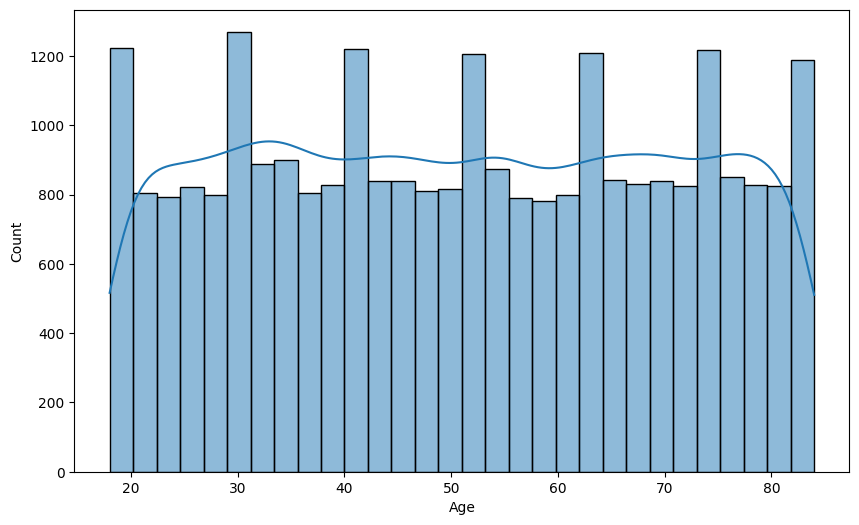

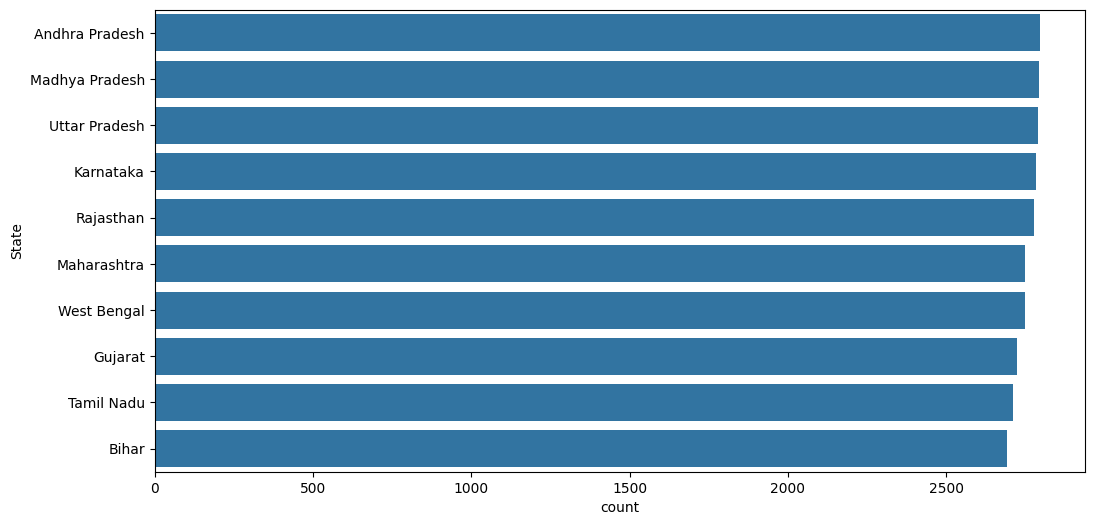

In [9]:
# python
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='State', data=df, order=df['State'].value_counts().index)
plt.show()


**6. Bivariate Analysis**

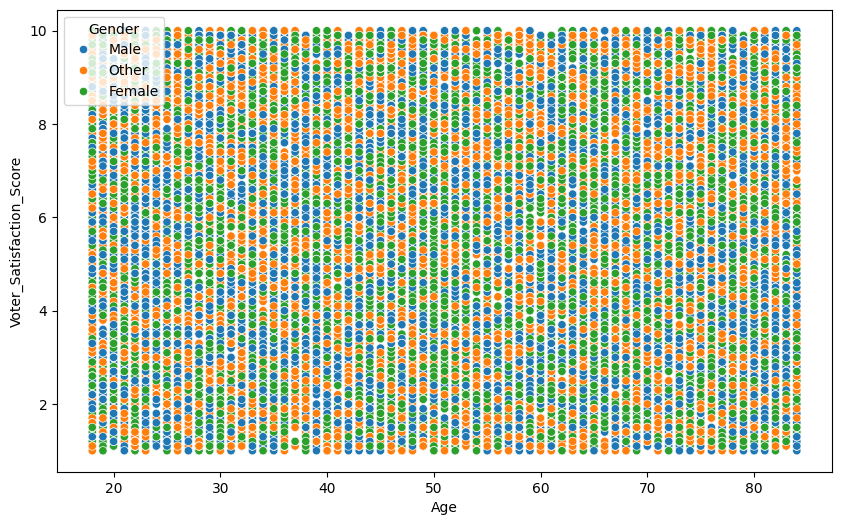

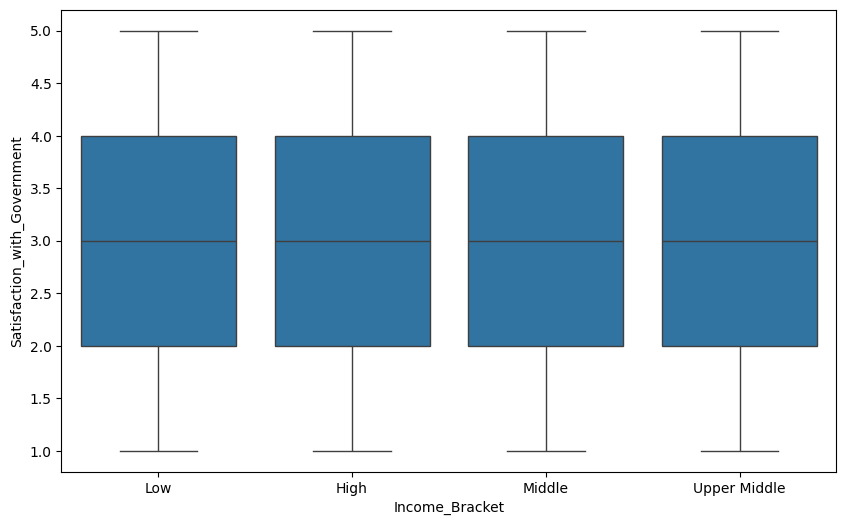

In [10]:
# python
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Voter_Satisfaction_Score', hue='Gender', data=df)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Income_Bracket', y='Satisfaction_with_Government', data=df)
plt.show()


**7. Outlier Detection**

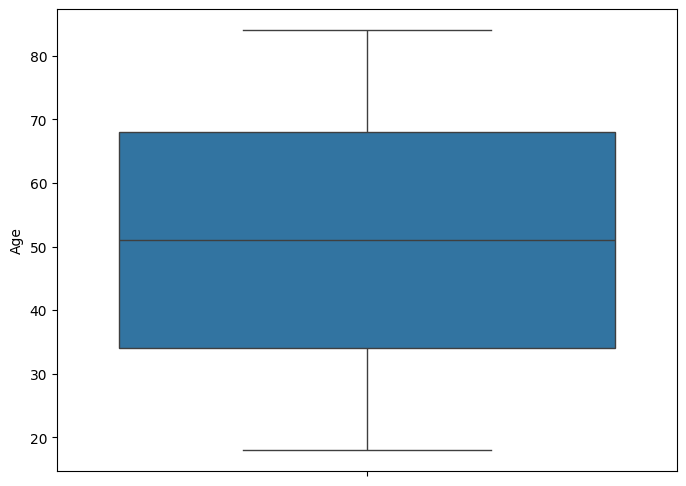

0


In [11]:
# python
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Age'])
plt.show()

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR))]
print(len(outliers))


**8. Duplicate Record Handling**

In [ ]:
# python
duplicates = df.duplicated()
print(duplicates.sum())
df_cleaned = df.drop_duplicates()


**9. Correlation Analysis**

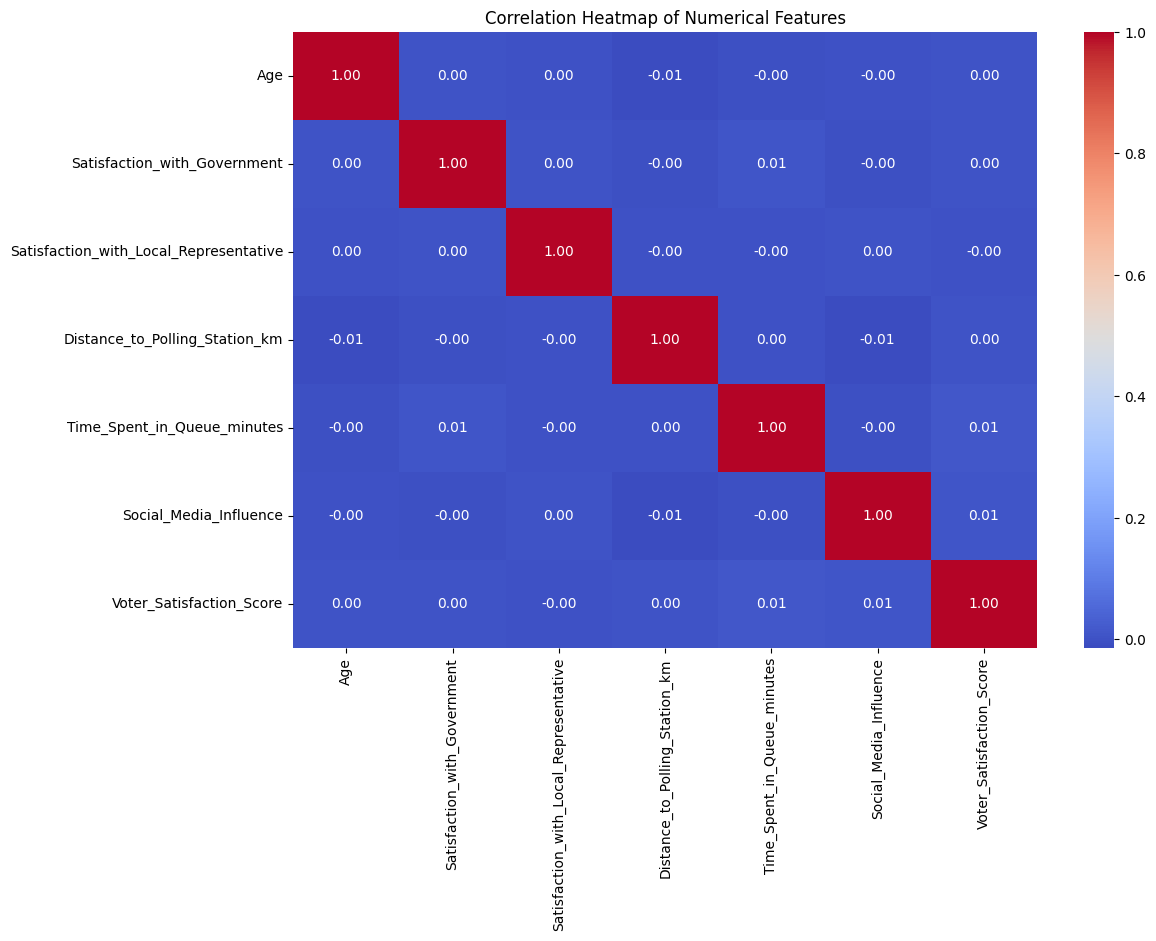

In [14]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


**10. Feature Engineering**

In [16]:
# python
df['Queue_Time_Category'] = pd.cut(df['Time_Spent_in_Queue_minutes'], bins=[0, 30, 60, 120, 180],
                                   labels=['Short', 'Medium', 'Long', 'Very Long'])
print(df[['Time_Spent_in_Queue_minutes', 'Queue_Time_Category']].head())


   Time_Spent_in_Queue_minutes Queue_Time_Category
0                           98                Long
1                           10               Short
2                           86                Long
3                          102                Long
4                          169           Very Long


**11. Encoding Categorical Variables**

In [17]:
# python
df_encoded = pd.get_dummies(df, columns=['Gender', 'Income_Bracket', 'Polling_Station_Type'], drop_first=True)
print(df_encoded.head())


  Voter_ID           State   Region  Age Education_Level  Occupation  \
0  VOTER_1       Rajasthan  Central   69    No Schooling     Retired   
1  VOTER_2     West Bengal  Central   32    No Schooling  Unemployed   
2  VOTER_3     West Bengal     West   78    No Schooling      Farmer   
3  VOTER_4   Uttar Pradesh    South   38         Primary      Doctor   
4  VOTER_5  Andhra Pradesh     East   41    No Schooling    Business   

  Party_Preference Voted  Satisfaction_with_Government  \
0          Party B   Yes                             1   
1          Party D    No                             3   
2          Party E   Yes                             4   
3          Party D   Yes                             2   
4          Party D    No                             4   

   Satisfaction_with_Local_Representative  ... Weather_on_Polling_Day  \
0                                       1  ...                 Cloudy   
1                                       2  ...                  Rainy   

**12. Data Transformation**

In [18]:
# python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = ['Age', 'Time_Spent_in_Queue_minutes', 'Voter_Satisfaction_Score']
df_scaled = df_encoded.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
print(df_scaled.head())


  Voter_ID           State   Region       Age Education_Level  Occupation  \
0  VOTER_1       Rajasthan  Central  0.772727    No Schooling     Retired   
1  VOTER_2     West Bengal  Central  0.212121    No Schooling  Unemployed   
2  VOTER_3     West Bengal     West  0.909091    No Schooling      Farmer   
3  VOTER_4   Uttar Pradesh    South  0.303030         Primary      Doctor   
4  VOTER_5  Andhra Pradesh     East  0.348485    No Schooling    Business   

  Party_Preference Voted  Satisfaction_with_Government  \
0          Party B   Yes                             1   
1          Party D    No                             3   
2          Party E   Yes                             4   
3          Party D   Yes                             2   
4          Party D    No                             4   

   Satisfaction_with_Local_Representative  ... Weather_on_Polling_Day  \
0                                       1  ...                 Cloudy   
1                                       2 

**13. Distribution Analysis**

<ipython-input-19-a5a9bb78b9a8>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Voter_Satisfaction_Score'], shade=True)


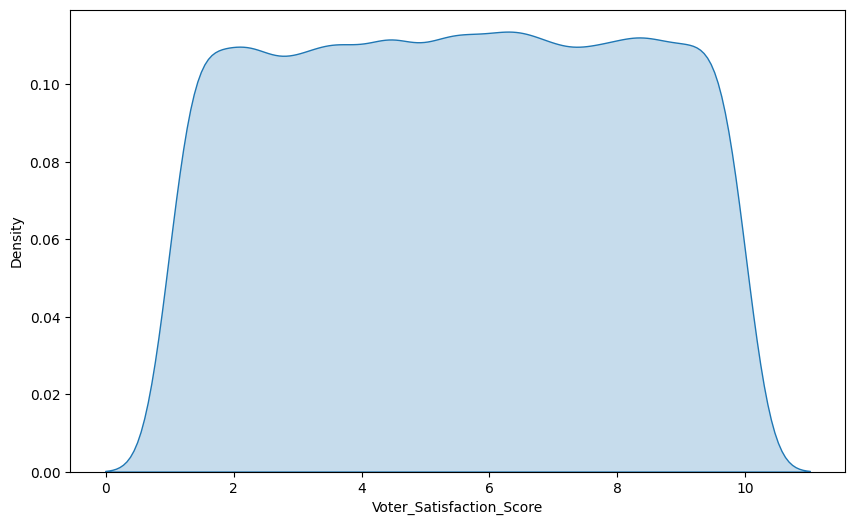

In [19]:
# python
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Voter_Satisfaction_Score'], shade=True)
plt.show()


**14. Visualization of Insights**

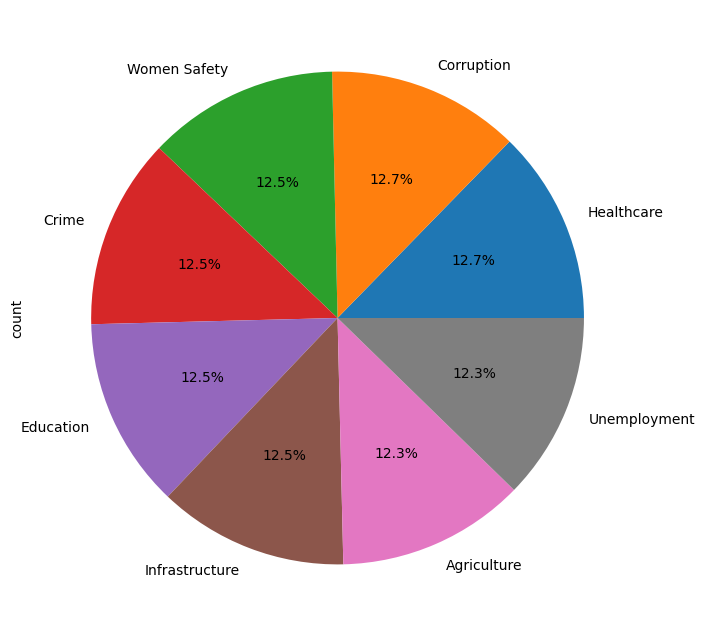

In [20]:
# python
plt.figure(figsize=(8, 8))
df['Key_Issue'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()
